# Program-12 : Logistic Regression for classification for MNIST dataset. Confusion matrix and classification report. Heatmap visualization also.

In [3]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


Loading MNIST dataset...
Training Logistic regression model...


C:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Coefficients: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Intercept: [-1.01805539  1.13492604  0.07544254 -0.83731804  0.22441809  2.04073772
 -0.38165595  1.58052209 -2.31854168 -0.50047541]
Mean Squared Error: 1.3655
R2 Score: 0.8368787890473913
Accuracy: 0.9203
 Accuracy: 92.03%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.90      0.90      0.90      1433
           4       0.92      0.93      0.92      1295
           5       0.87      0.89      0.88      1273
           6       0.95      0.95      0.95      1396
           7       0.93      0.94      0.94      1503
           8       0.90      0.87      0.88      1357
           9       0.90      0.89      0

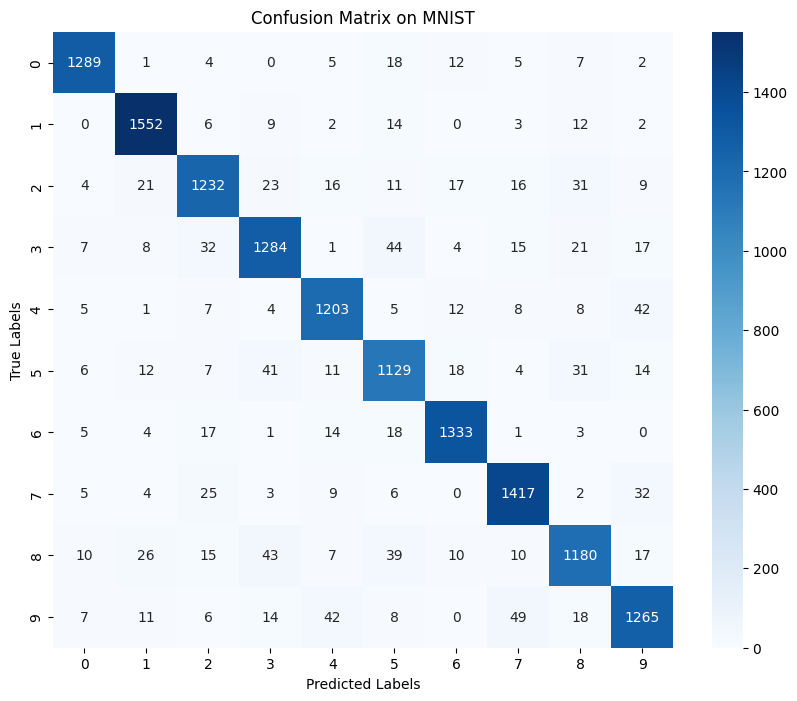

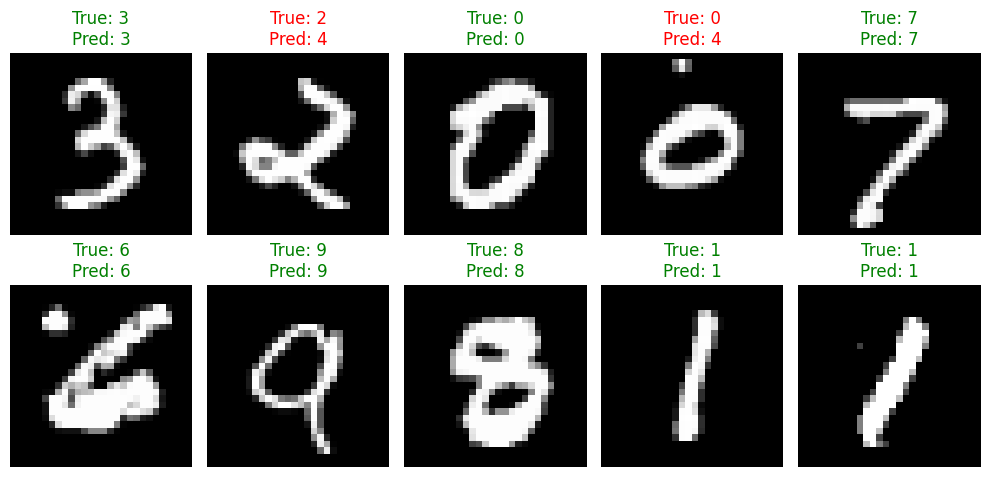

In [5]:
# Step 1: Load the MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

# Step 2: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Step 4: Train Logistic regression model
print("Training Logistic regression model...")
reg = LogisticRegression()
reg.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = reg.predict(X_test)

y_proba = reg.predict_proba(X_test)

# Step 6: Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f" Accuracy: {accuracy * 100:.2f}%")

# Step 7: Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 8: Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix on MNIST")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Step 9: Visualize Random Predictions
indices = np.random.choice(len(X_test), 10, replace=False)
plt.figure(figsize=(10, 5))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    
    # Color title: green for correct, red for wrong
    color = 'green' if y_pred[idx] == y_test[idx] else 'red'
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()